<a href="https://colab.research.google.com/github/fahadrajput99/EDA-Using-Pandas/blob/main/Zoo-porject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df=pd.read_excel("/content/Zoo-roject.csv.xlsx")
df

,Animals,Weight(kg),Top Speed (km/h),Lifespan(years),Social Behaviour,Diet,Habitat
0,African Buffalo,700,50,35,Social,Harbivore,Grasslands
1,Alligator,400,15,50,Solitary,Carnivore,Water
2,Angus cattle,700,40,20,Social,Herbivore,Rangeland
3,Beaver,30,8,12,Social,Herbivore,Water
4,Bison,1000,55,25,Social,Herbivore,Grasslands
5,Camel,500,65,40,Social,Herbivore,Deserts
6,Cheetah,60,120,12,Solitary,Carnivore,Grasslands
7,Chimpanzee,50,40,46,Social,Omnivore,Forests
8,Crocodile,1500,15,70,Solitary,Carnivore,Water
9,Elephant,5000,40,70,Social,Herbivore,Grasslands


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [15]:
df = pd.get_dummies(df, columns=['Social Behaviour', 'Diet', 'Habitat'])

In [16]:
# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.iloc[: , 1:])

In [17]:
# Implementing K-means algorithm
def kmeans_algorithm(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data)
    return kmeans.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

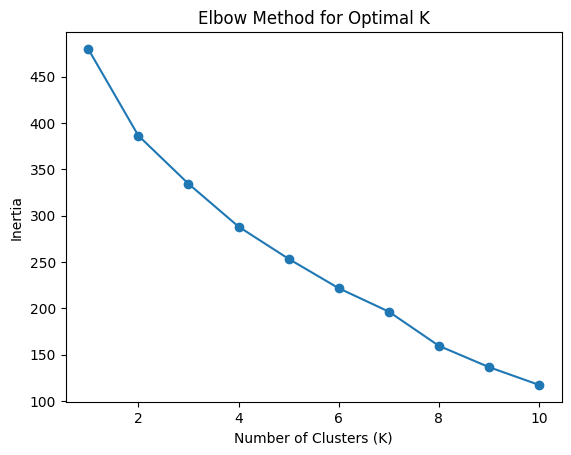

In [18]:
# Applying K-means algorithm repeatedly with different K's
inertia_values = []
max_clusters = 10  # Maximum number of clusters to try

for k in range(1, max_clusters + 1):
    inertia_values.append(kmeans_algorithm(scaled_features, k))

# Plot the elbow graph
plt.plot(range(1, max_clusters + 1), inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [20]:
# the best number of cluster
optimal_k = 3

# Fit K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [21]:
# Assign labels and add them to the DataFrame
df['Cluster'] = kmeans.labels_

# Define meaningful labels for the clusters
cluster_labels = {
    0: 'Large Herbivores',
    1: 'Carnivores',
    2: 'Social Animals'
}

In [22]:
df['Cluster Name'] = df['Cluster'].map(cluster_labels)

print(df[['Animals', 'Cluster', 'Cluster Name']])

             Animals  Cluster      Cluster Name
0    African Buffalo        2    Social Animals
1          Alligator        1        Carnivores
2       Angus cattle        2    Social Animals
3             Beaver        2    Social Animals
4              Bison        2    Social Animals
5              Camel        2    Social Animals
6            Cheetah        1        Carnivores
7         Chimpanzee        1        Carnivores
8          Crocodile        0  Large Herbivores
9           Elephant        0  Large Herbivores
10               Fox        0  Large Herbivores
11            Ghazel        2    Social Animals
12           Giraffe        2    Social Animals
13              Goat        2    Social Animals
14           Gorilla        2    Social Animals
15      Grizzly Bear        1        Carnivores
16             Hippo        0  Large Herbivores
17          Kangaroo        2    Social Animals
18              Lion        2    Social Animals
19         Orangutan        1        Car